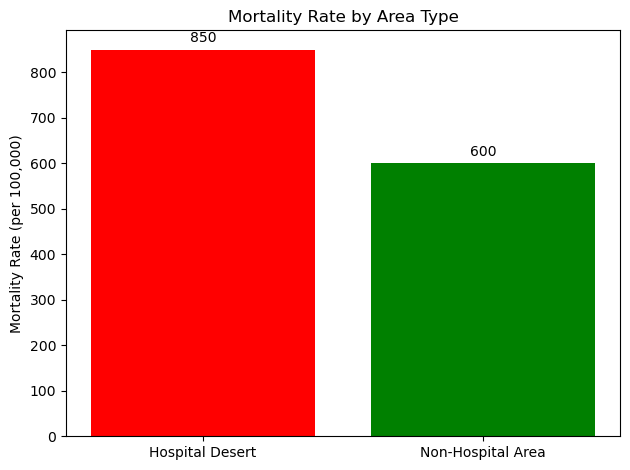

In [1]:
import matplotlib.pyplot as plt

areas = ['Hospital Desert', 'Non-Hospital Area']
rates = [850, 600]

fig, ax = plt.subplots()
bars = ax.bar(areas, rates, color=['red', 'green'])
ax.set_ylabel('Mortality Rate (per 100,000)')
ax.set_title('Mortality Rate by Area Type')
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 10, yval, ha='center', va='bottom')
plt.tight_layout()
plt.savefig('mortality_rate_comparison.png')


In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load Milwaukee boundaries
milwaukee_boundaries = gpd.read_file('path_to_milwaukee_boundaries.shp')

# Load Hospital locations
hospital_data = gpd.read_file('path_to_hospital_locations.geojson')  # Ensure your file's format is correct

# Create a base map
fig, ax = plt.subplots(figsize=(10, 10))
milwaukee_boundaries.plot(ax=ax, color='lightgrey', edgecolor='black')

# Plot hospitals
hospital_data.plot(ax=ax, color='red', markersize=30, label='Hospitals')

# Optionally, you can create a hexbin or density plot to show areas with fewer hospitals
hospital_density = hospital_data.geometry.unary_union.buffer(0.001).envelope  # Adjust buffer as necessary

ax.set_title('Hospital Locations in Milwaukee', fontsize=15)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

# Save the plot if desired
plt.savefig('milwaukee_hospital_deserts.png')

DriverError: Failed to open dataset (flags=68): path_to_milwaukee_boundaries.shp

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Download Milwaukee boundary (for demonstration, using US counties)
counties = gpd.read_file("https://www2.census.gov/geo/tiger/GENZ2022/shp/cb_2022_us_county_500k.zip")
milwaukee = counties[(counties['STATEFP'] == '55') & (counties['NAME'] == 'Milwaukee')]

# Example hospital locations (replace with real data for accuracy)
import pandas as pd
hospital_data = {
    'name': ['Hospital A', 'Hospital B', 'Hospital C'],
    'lon': [-87.948, -87.906, -87.973],
    'lat': [43.038, 43.063, 42.997]
}
hospitals = gpd.GeoDataFrame(
    hospital_data,
    geometry=gpd.points_from_xy(hospital_data['lon'], hospital_data['lat']),
    crs="EPSG:4326"
)

# Project to Web Mercator for plotting with contextily
milwaukee = milwaukee.to_crs(epsg=3857)
hospitals = hospitals.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(10, 10))
milwaukee.boundary.plot(ax=ax, color='black', linewidth=1)
hospitals.plot(ax=ax, color='red', markersize=100, label='Hospitals')

# Visualize hospital deserts as areas >3 miles from any hospital (buffer example)
hospital_buffers = hospitals.buffer(4828)  # 3 miles in meters
gpd.GeoSeries(hospital_buffers).plot(ax=ax, color='blue', alpha=0.2, label='3-mile Access')

milwaukee.boundary.plot(ax=ax, color='black', linewidth=1)
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)
ax.set_title("Hospital Deserts in Milwaukee")
ax.legend()
plt.axis('off')
plt.show()

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1028)>